In [1]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('credit_nepal_1000.csv')

In [4]:
df_loan_data = df.copy()

In [5]:
print(df_loan_data.shape)
df_loan_data.head()

(1000, 20)


,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 Rs,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1000 - 200000 Rs,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100000 Rs,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100000 Rs,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 Rs,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100000 Rs,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 Rs,24,1800,0.00,1800.00000,poor,car,4870,< 100000 Rs,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
df_loan_data['other_credit'].value_counts()

none     814
bank     139
store     47
Name: other_credit, dtype: int64

In [7]:
df_loan_data.isnull().sum()

checking_balance        0
months_loan_duration    0
funded_amnt             0
total_rec_prncp         0
recoveries              0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [8]:
# Cleaning out data

df_loan_data['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations', 'car0'], dtype=object)

In [9]:
# Since 'car' and 'car0' is same, we change car0 to car

df_loan_data['purpose'] = df_loan_data['purpose'].str.replace('car0', 'car')

In [10]:
# Converting all categorical variables into dummy variable

loan_data_dummies = [pd.get_dummies(df_loan_data['checking_balance'], prefix='checking_balance'),
                    pd.get_dummies(df_loan_data['credit_history'], prefix='credit_history'),
                    pd.get_dummies(df_loan_data['purpose'], prefix='purpose'),
                    pd.get_dummies(df_loan_data['savings_balance'], prefix='savings_balance'),
                    pd.get_dummies(df_loan_data['employment_duration'], prefix='employment_duration'),
                    pd.get_dummies(df_loan_data['other_credit'], prefix='other_credit'),
                    pd.get_dummies(df_loan_data['housing'], prefix='housing'),
                    pd.get_dummies(df_loan_data['job'], prefix='job'),
                    pd.get_dummies(df_loan_data['phone'], prefix='phone')]

In [11]:
# Convert the dummies to dataframe

loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [12]:
print(loan_data_dummies.shape)
loan_data_dummies.head()

(1000, 36)


,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [13]:
# Concat with original loan dataframe

df_loan_data = pd.concat([df_loan_data, loan_data_dummies], axis=1)
print(df_loan_data.shape)

(1000, 56)


In [14]:
df_loan_data.columns.values

array(['checking_balance', 'months_loan_duration', 'funded_amnt',
       'total_rec_prncp', 'recoveries', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration',
       'percent_of_income', 'years_at_residence', 'age', 'other_credit',
       'housing', 'existing_loans_count', 'job', 'dependents', 'phone',
       'default', 'checking_balance_1000 - 200000 Rs',
       'checking_balance_< 0 Rs', 'checking_balance_> 200000 Rs',
       'checking_balance_unknown', 'credit_history_critical',
       'credit_history_good', 'credit_history_perfect',
       'credit_history_poor', 'credit_history_very good',
       'purpose_business', 'purpose_car', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'savings_balance_100000 - 500000 Rs',
       'savings_balance_500000 - 1000000 Rs',
       'savings_balance_< 100000 Rs', 'savings_balance_> 1000000 Rs',
       'savings_balance_unknown', 'employment_duration_1 - 4 years',
       'e

In [15]:
print(df_loan_data.shape)
df_loan_data.head()

(1000, 56)


,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,< 0 Rs,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1000 - 200000 Rs,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100000 Rs,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100000 Rs,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,< 0 Rs,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100000 Rs,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,< 0 Rs,24,1800,0.00,1800.00000,poor,car,4870,< 100000 Rs,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [16]:
default_cat =  ['yes', 'no']

ord_enc = OrdinalEncoder(categories=[default_cat])
df_loan_data[['default_encoded']]= ord_enc.fit_transform(df_loan_data[['default']])
df_loan_data[['default_encoded']]= df_loan_data[['default_encoded']].astype(int)
print(df_loan_data.shape)
df_loan_data.head()

(1000, 57)


,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,default_encoded
0,< 0 Rs,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
1,1000 - 200000 Rs,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100000 Rs,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100000 Rs,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1
3,< 0 Rs,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100000 Rs,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
4,< 0 Rs,24,1800,0.00,1800.00000,poor,car,4870,< 100000 Rs,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0


# Calculating Weight of evidence for discrete variables

In [17]:
# Function that calculates weight of evidence

def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), 
                     df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [18]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WOE']
    plt.figure(figsize=(18,6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

# Variable : checking_balance

In [19]:
df_loan_data['checking_balance'].unique()

array(['< 0 Rs', '1000 - 200000 Rs', 'unknown', '> 200000 Rs'],
      dtype=object)

In [20]:
df_temp = woe_discrete(df_loan_data, 'checking_balance', df_loan_data['default_encoded'])
df_temp

,checking_balance,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,< 0 Rs,274,0.507299,0.274,139.0,135.0,0.198571,0.450000,-0.818099,NaN,NaN,0.666012
1,1000 - 200000 Rs,269,0.609665,0.269,164.0,105.0,0.234286,0.350000,-0.401392,0.102366,0.416707,0.666012
2,> 200000 Rs,63,0.777778,0.063,49.0,14.0,0.070000,0.046667,0.405465,0.168112,0.806857,0.666012
3,unknown,394,0.883249,0.394,348.0,46.0,0.497143,0.153333,1.176263,0.105471,0.770798,0.666012


In [21]:
# Based on the Information Value, 'checking_balance' has 'Very strong' predictive power

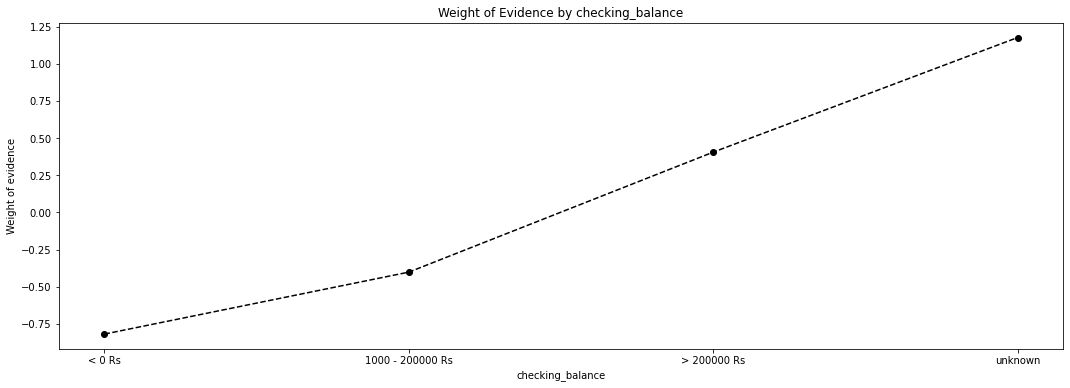

In [22]:
plot_by_woe(df_temp)

# Variable : credit_history

In [23]:
df_loan_data['credit_history'].unique()

array(['critical', 'good', 'poor', 'perfect', 'very good'], dtype=object)

In [24]:
df_temp = woe_discrete(df_loan_data, 'credit_history', df_loan_data['default_encoded'])
df_temp

,credit_history,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,perfect,40,0.375000,0.040,15.0,25.0,0.021429,0.083333,-1.358123,NaN,NaN,0.293234
1,very good,49,0.428571,0.049,21.0,28.0,0.030000,0.093333,-1.134980,0.053571,0.223144,0.293234
2,good,530,0.681132,0.530,361.0,169.0,0.515714,0.563333,-0.088319,0.252561,1.046661,0.293234
3,poor,88,0.681818,0.088,60.0,28.0,0.085714,0.093333,-0.085158,0.000686,0.003161,0.293234
4,critical,293,0.829352,0.293,243.0,50.0,0.347143,0.166667,0.733741,0.147533,0.818898,0.293234


In [25]:
# Based on Information value, 'credit_history' has strong predictive power

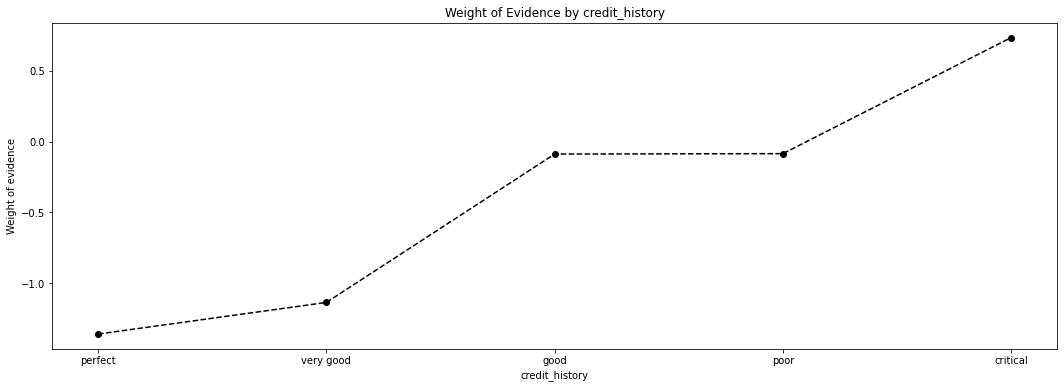

In [26]:
plot_by_woe(df_temp)

In [27]:
df_loan_data['credit_history_perfect_good_verygood'] = sum([df_loan_data['credit_history_perfect'], df_loan_data['credit_history_good'],df_loan_data['credit_history_very good']])
df_loan_data['credit_history_poor_critical'] = sum([df_loan_data['credit_history_critical'],df_loan_data['credit_history_poor']])

# Variable : purpose

In [28]:
df_loan_data['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations'], dtype=object)

In [29]:
df_temp = woe_discrete(df_loan_data, 'purpose', df_loan_data['default_encoded'])
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,education,59,0.610169,0.059,36.0,23.0,0.051429,0.076667,-0.399273,NaN,NaN,0.035892
1,renovations,22,0.636364,0.022,14.0,8.0,0.020000,0.026667,-0.287682,0.026194,0.111591,0.035892
2,business,97,0.649485,0.097,63.0,34.0,0.090000,0.113333,-0.230524,0.013121,0.057158,0.035892
3,car,349,0.681948,0.349,238.0,111.0,0.340000,0.370000,-0.084557,0.032464,0.145966,0.035892
4,furniture/appliances,473,0.737844,0.473,349.0,124.0,0.498571,0.413333,0.187492,0.055895,0.272050,0.035892


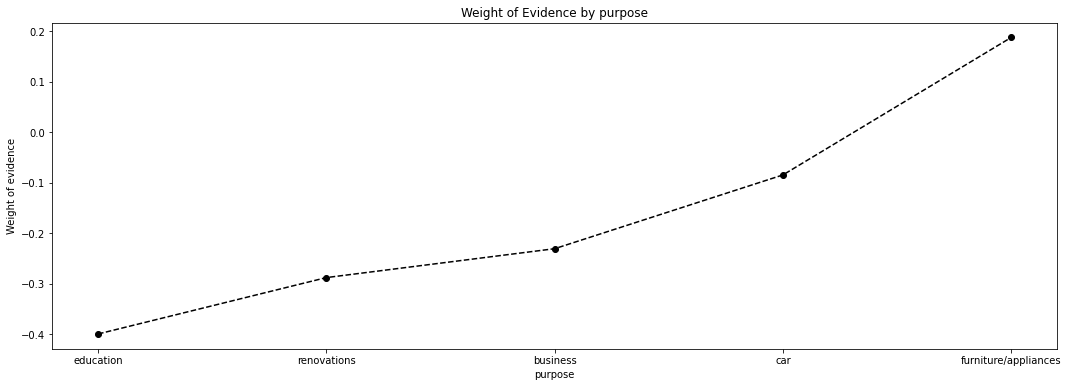

In [30]:
plot_by_woe(df_temp)

In [31]:
df_loan_data['purpose_edu_ren_bus'] = sum([df_loan_data['purpose_business'],df_loan_data['purpose_education'], 
                                          df_loan_data['purpose_renovations']])

# Variable : savings_balance

In [32]:
df_loan_data['savings_balance'].unique()

array(['unknown', '< 100000 Rs', '500000 - 1000000 Rs', '> 1000000 Rs',
       '100000 - 500000 Rs'], dtype=object)

In [33]:
df_temp = woe_discrete(df_loan_data, 'savings_balance', df_loan_data['default_encoded'])
df_temp

,savings_balance,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,< 100000 Rs,603,0.640133,0.603,386.0,217.0,0.551429,0.723333,-0.271358,NaN,NaN,0.19601
1,100000 - 500000 Rs,103,0.669903,0.103,69.0,34.0,0.098571,0.113333,-0.139552,0.029770,0.131806,0.19601
2,unknown,183,0.825137,0.183,151.0,32.0,0.215714,0.106667,0.704246,0.155234,0.843798,0.19601
3,500000 - 1000000 Rs,63,0.825397,0.063,52.0,11.0,0.074286,0.036667,0.706051,0.000260,0.001805,0.19601
4,> 1000000 Rs,48,0.875000,0.048,42.0,6.0,0.060000,0.020000,1.098612,0.049603,0.392562,0.19601


In [34]:
# Based on Information value, 'savings_balance' has medium predictive power

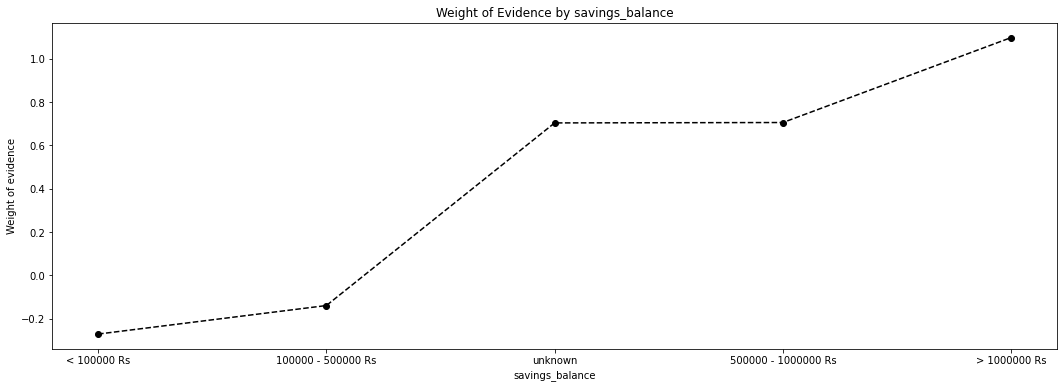

In [35]:
plot_by_woe(df_temp)

In [36]:
df_loan_data['savings_balance_<100000Rs_100000-500000Rs'] = sum([df_loan_data['savings_balance_< 100000 Rs'],df_loan_data['savings_balance_100000 - 500000 Rs']])
df_loan_data['savings_balance_500000-1000000Rs'] = sum([df_loan_data['savings_balance_500000 - 1000000 Rs'], df_loan_data['savings_balance_> 1000000 Rs']])

#  Variable : employment_duration

In [37]:
df_loan_data['employment_duration'].unique()

array(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed',
       '< 1 year'], dtype=object)

In [38]:
df_temp = woe_discrete(df_loan_data, 'employment_duration', df_loan_data['default_encoded'])
df_temp

,employment_duration,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,< 1 year,172,0.593023,0.172,102.0,70.0,0.145714,0.233333,-0.470820,NaN,NaN,0.086434
1,unemployed,62,0.629032,0.062,39.0,23.0,0.055714,0.076667,-0.319230,0.036009,0.151590,0.086434
2,1 - 4 years,339,0.693215,0.339,235.0,104.0,0.335714,0.346667,-0.032103,0.064183,0.287127,0.086434
3,> 7 years,253,0.747036,0.253,189.0,64.0,0.270000,0.213333,0.235566,0.053820,0.267669,0.086434
4,4 - 7 years,174,0.775862,0.174,135.0,39.0,0.192857,0.130000,0.394415,0.028826,0.158849,0.086434


In [39]:
# Based on Information value, 'employment_duration has weak predictive power'

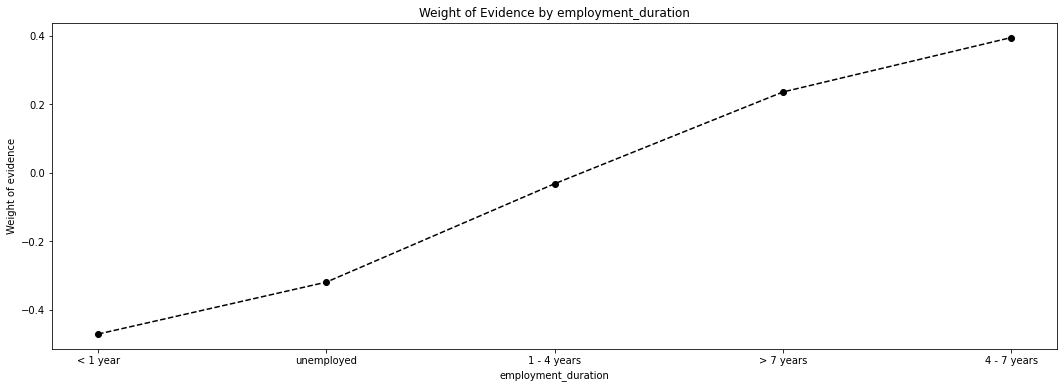

In [40]:
plot_by_woe(df_temp)

In [41]:
df_loan_data['employment_duration_<1yr_unemployed'] = sum([df_loan_data['employment_duration_< 1 year'],df_loan_data['employment_duration_unemployed']])
df_loan_data['employment_duration_>7yr_4-7yr'] = sum([df_loan_data['employment_duration_> 7 years'],df_loan_data['employment_duration_4 - 7 years']])

# Variable : other_credit

In [42]:
df_loan_data['other_credit'].unique()

array(['none', 'bank', 'store'], dtype=object)

In [43]:
df_temp = woe_discrete(df_loan_data, 'other_credit', df_loan_data['default_encoded'])
df_temp

,other_credit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,bank,139,0.589928,0.139,82.0,57.0,0.117143,0.190000,-0.483630,NaN,NaN,0.057615
1,store,47,0.595745,0.047,28.0,19.0,0.040000,0.063333,-0.459532,0.005817,0.024098,0.057615
2,none,814,0.724816,0.814,590.0,224.0,0.842857,0.746667,0.121179,0.129071,0.580711,0.057615


In [44]:
# Based on Information value, it has weak predictive power

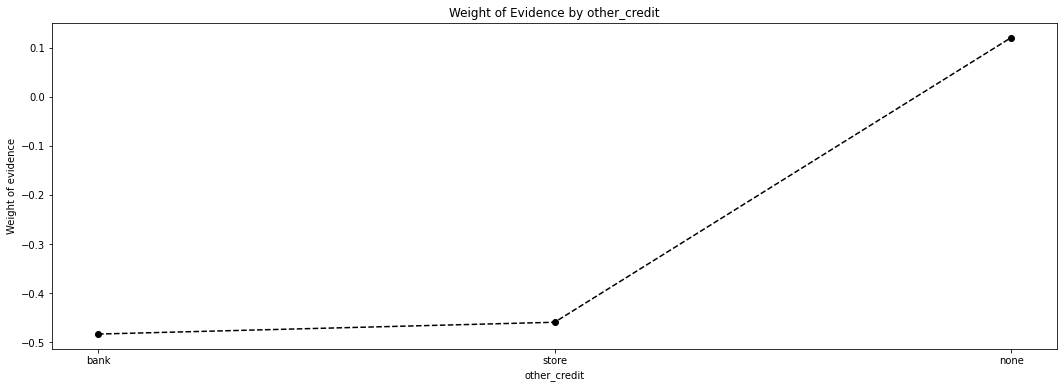

In [45]:
plot_by_woe(df_temp)

In [46]:
df_loan_data['other_credit_bank_store'] = sum([df_loan_data['other_credit_bank'],df_loan_data['other_credit_store']])

# Variable : housing

In [47]:
df_loan_data['housing'].unique()

array(['own', 'other', 'rent'], dtype=object)

In [48]:
df_temp = woe_discrete(df_loan_data, 'housing', df_loan_data['default_encoded'])
df_temp

,housing,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,other,108,0.592593,0.108,64.0,44.0,0.091429,0.146667,-0.472604,NaN,NaN,0.083293
1,rent,179,0.608939,0.179,109.0,70.0,0.155714,0.233333,-0.404445,0.016346,0.068159,0.083293
2,own,713,0.739130,0.713,527.0,186.0,0.752857,0.620000,0.194156,0.130192,0.598601,0.083293


In [49]:
# Based on Information value, it has weak predictive power

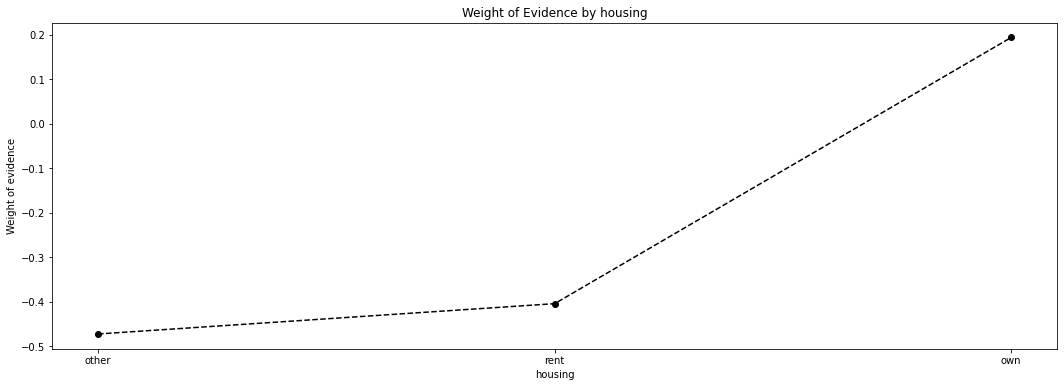

In [50]:
plot_by_woe(df_temp)

In [51]:
df_loan_data['housing_other_rent'] = sum([df_loan_data['housing_other'],df_loan_data['housing_rent']])

# Variable : job

In [52]:
df_loan_data['job'].unique()

array(['skilled', 'unskilled', 'management', 'unemployed'], dtype=object)

In [53]:
df_temp = woe_discrete(df_loan_data, 'job', df_loan_data['default_encoded'])
df_temp

,job,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,management,148,0.655405,0.148,97.0,51.0,0.138571,0.170000,-0.204413,NaN,NaN,0.008763
1,unemployed,22,0.681818,0.022,15.0,7.0,0.021429,0.023333,-0.085158,0.026413,0.119255,0.008763
2,skilled,630,0.704762,0.630,444.0,186.0,0.634286,0.620000,0.022780,0.022944,0.107938,0.008763
3,unskilled,200,0.720000,0.200,144.0,56.0,0.205714,0.186667,0.097164,0.015238,0.074384,0.008763


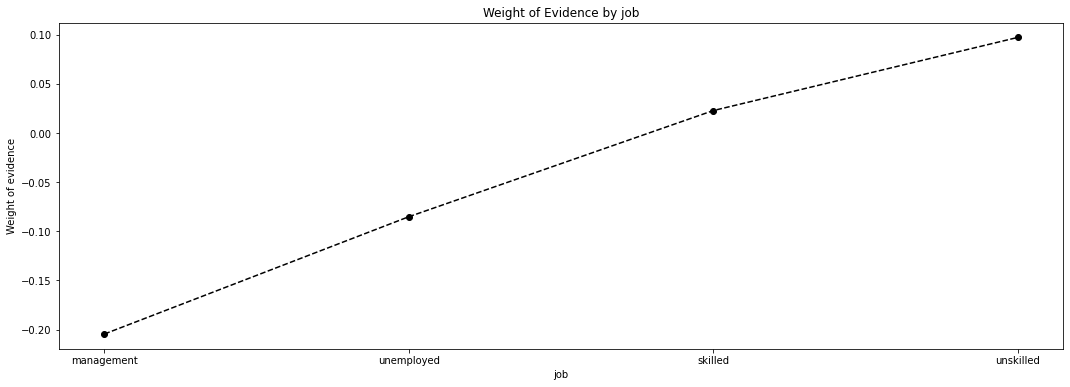

In [54]:
plot_by_woe(df_temp)

In [55]:
# Based on IV, 'job' has no predictive power

# Variable : phone

In [56]:
df_loan_data['phone'].unique()

array(['yes', 'no'], dtype=object)

In [57]:
df_temp = woe_discrete(df_loan_data, 'phone', df_loan_data['default_encoded'])
df_temp

,phone,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,no,596,0.686242,0.596,409.0,187.0,0.584286,0.623333,-0.064691,NaN,NaN,0.006378
1,yes,404,0.720297,0.404,291.0,113.0,0.415714,0.376667,0.098638,0.034055,0.163329,0.006378


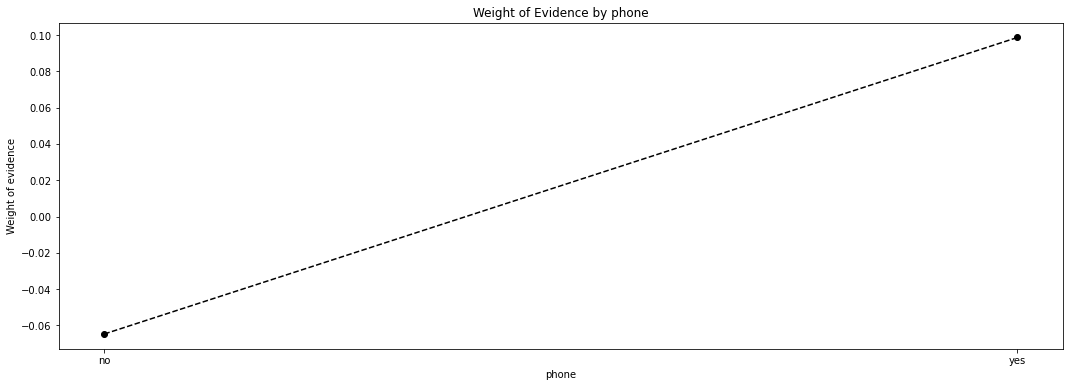

In [58]:
plot_by_woe(df_temp)

In [59]:
# Based on IV, 'phone' has no predictive power

# Calculating Weight of evidence for numeric variables

In [60]:
numeric_columns = df.select_dtypes(include=int)
numeric_columns = numeric_columns.columns
numeric_columns

Index(['months_loan_duration', 'funded_amnt', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents'],
      dtype='object')

In [61]:
# Function that calculates weight of evidence

def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), 
                     df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

# Variable : months_loan_duration 

In [62]:
df_loan_data['months_loan_duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [63]:
df_loan_data['months_loan_duration_factor'] = pd.cut(df_loan_data['months_loan_duration'], 10)

In [64]:
df_temp = woe_ordered_continuous(df_loan_data, 'months_loan_duration_factor', df_loan_data['default_encoded'])
df_temp

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,months_loan_duration_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,"(3.932, 10.8]",171,0.842105,0.171,144.0,27.0,0.205714,0.090000,0.826679,NaN,NaN,inf
1,"(10.8, 17.6]",262,0.759542,0.262,199.0,63.0,0.284286,0.210000,0.302872,0.082563,0.523806,inf
2,"(17.6, 24.4]",337,0.679525,0.337,229.0,108.0,0.327143,0.360000,-0.095707,0.080017,0.398579,inf
3,"(24.4, 31.2]",57,0.666667,0.057,38.0,19.0,0.054286,0.063333,-0.154151,0.012859,0.058444,inf
4,"(31.2, 38.0]",86,0.558140,0.086,48.0,38.0,0.068571,0.126667,-0.613683,0.108527,0.459532,inf
5,"(38.0, 44.8]",17,0.705882,0.017,12.0,5.0,0.017143,0.016667,0.028171,0.147743,0.641854,inf
6,"(44.8, 51.6]",54,0.407407,0.054,22.0,32.0,0.031429,0.106667,-1.221991,0.298475,1.250162,inf
7,"(51.6, 58.4]",2,0.500000,0.002,1.0,1.0,0.001429,0.003333,-0.847298,0.092593,0.374693,inf
8,"(58.4, 65.2]",13,0.538462,0.013,7.0,6.0,0.010000,0.020000,-0.693147,0.038462,0.154151,inf
9,"(65.2, 72.0]",1,0.000000,0.001,0.0,1.0,0.000000,0.003333,-inf,0.538462,inf,inf


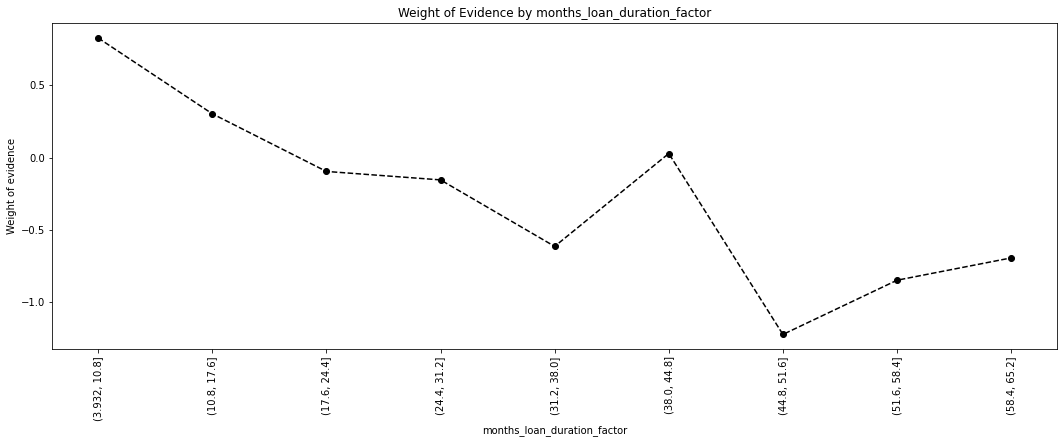

In [65]:
plot_by_woe(df_temp, 90)

In [66]:
df_loan_data['months_loan_duration_<11'] =  np.where(df_loan_data['months_loan_duration'].isin(range(12)), 1, 0)
df_loan_data['months_loan_duration_12-18'] = np.where(df_loan_data['months_loan_duration'].isin(range(12, 19)), 1, 0)
df_loan_data['months_loan_duration_>18'] = np.where(df_loan_data['months_loan_duration'].isin(range(19, int(df_loan_data['months_loan_duration'].max()))), 1, 0)

# Variable : 'amount'

In [67]:
df_loan_data['amount_factor'] = pd.cut(df_loan_data['amount'], 10)

In [68]:
df_temp = woe_ordered_continuous(df_loan_data, 'amount_factor', df_loan_data['default_encoded'])
df_temp

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,amount_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,"(231.826, 2067.4]",445,0.721348,0.445,321.0,124.0,0.458571,0.413333,0.103862,NaN,NaN,inf
1,"(2067.4, 3884.8]",293,0.778157,0.293,228.0,65.0,0.325714,0.216667,0.407660,0.056809,0.303799,inf
2,"(3884.8, 5702.2]",97,0.587629,0.097,57.0,40.0,0.081429,0.133333,-0.493126,0.190528,0.900787,inf
3,"(5702.2, 7519.6]",80,0.650000,0.080,52.0,28.0,0.074286,0.093333,-0.228259,0.062371,0.264867,inf
4,"(7519.6, 9337.0]",38,0.605263,0.038,23.0,15.0,0.032857,0.050000,-0.419854,0.044737,0.191595,inf
5,"(9337.0, 11154.4]",19,0.578947,0.019,11.0,8.0,0.015714,0.026667,-0.528844,0.026316,0.108990,inf
6,"(11154.4, 12971.8]",14,0.285714,0.014,4.0,10.0,0.005714,0.033333,-1.763589,0.293233,1.234744,inf
7,"(12971.8, 14789.2]",8,0.250000,0.008,2.0,6.0,0.002857,0.020000,-1.945910,0.035714,0.182322,inf
8,"(14789.2, 16606.6]",5,0.400000,0.005,2.0,3.0,0.002857,0.010000,-1.252763,0.150000,0.693147,inf
9,"(16606.6, 18424.0]",1,0.000000,0.001,0.0,1.0,0.000000,0.003333,-inf,0.400000,inf,inf


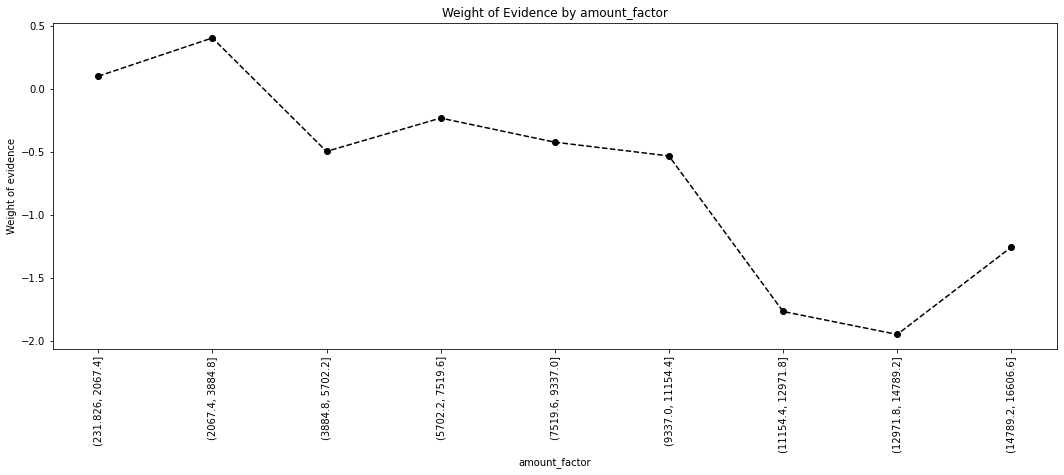

In [69]:
plot_by_woe(df_temp, 90)

In [70]:
df_loan_data['amount_<=2067'] =  np.where(df_loan_data['amount'] <= 2067, 1, 0)
df_loan_data['amount_>2067'] = np.where(df_loan_data['amount'] > 2067, 1, 0)

# Variable :  'percent_of_income'

In [71]:
df_loan_data['percent_of_income'].unique()

array([4, 2, 3, 1], dtype=int64)

In [72]:
df_temp = woe_ordered_continuous(df_loan_data, 'percent_of_income', df_loan_data['default_encoded'])
df_temp

,percent_of_income,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,1,136,0.750000,0.136,102.0,34.0,0.145714,0.113333,0.251314,NaN,NaN,0.026322
1,2,231,0.731602,0.231,169.0,62.0,0.241429,0.206667,0.155466,0.018398,0.095848,0.026322
2,3,157,0.713376,0.157,112.0,45.0,0.160000,0.150000,0.064539,0.018226,0.090928,0.026322
3,4,476,0.665966,0.476,317.0,159.0,0.452857,0.530000,-0.157300,0.047409,0.221839,0.026322


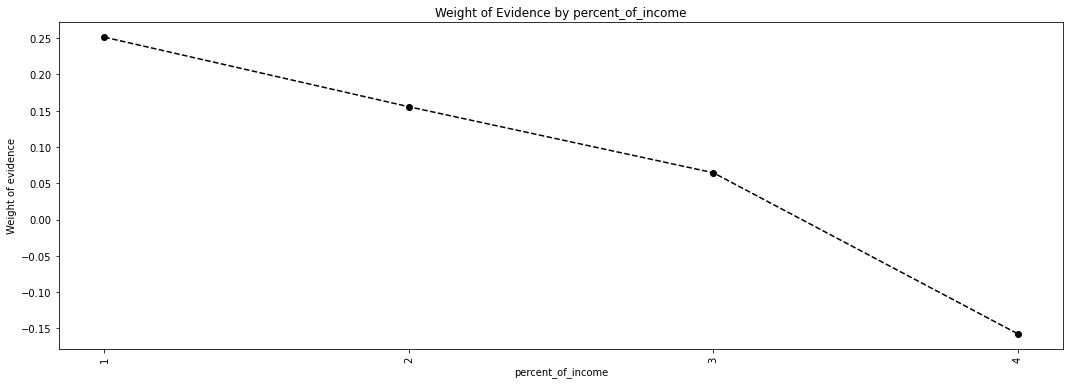

In [73]:
plot_by_woe(df_temp, 90)

In [74]:
df_loan_data['percent_of_income_1'] = np.where((df_loan_data['percent_of_income'] == 1), 1, 0)
df_loan_data['percent_of_income_2'] = np.where((df_loan_data['percent_of_income'] == 2), 1, 0)
df_loan_data['percent_of_income_3'] = np.where((df_loan_data['percent_of_income'] == 3), 1, 0)
df_loan_data['percent_of_income_4'] = np.where((df_loan_data['percent_of_income'] == 4), 1, 0)

# Variable : 'years_at_residence'

In [75]:
df_loan_data['years_at_residence'].unique()

array([4, 2, 3, 1], dtype=int64)

In [76]:
df_temp = woe_ordered_continuous(df_loan_data, 'years_at_residence', df_loan_data['default_encoded'])
df_temp

,years_at_residence,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,1,130,0.723077,0.130,94.0,36.0,0.134286,0.120000,0.112478,NaN,NaN,0.003589
1,2,308,0.685065,0.308,211.0,97.0,0.301429,0.323333,-0.070151,0.038012,0.182629,0.003589
2,3,149,0.711409,0.149,106.0,43.0,0.151429,0.143333,0.054941,0.026344,0.125092,0.003589
3,4,413,0.699758,0.413,289.0,124.0,0.412857,0.413333,-0.001153,0.011652,0.056094,0.003589


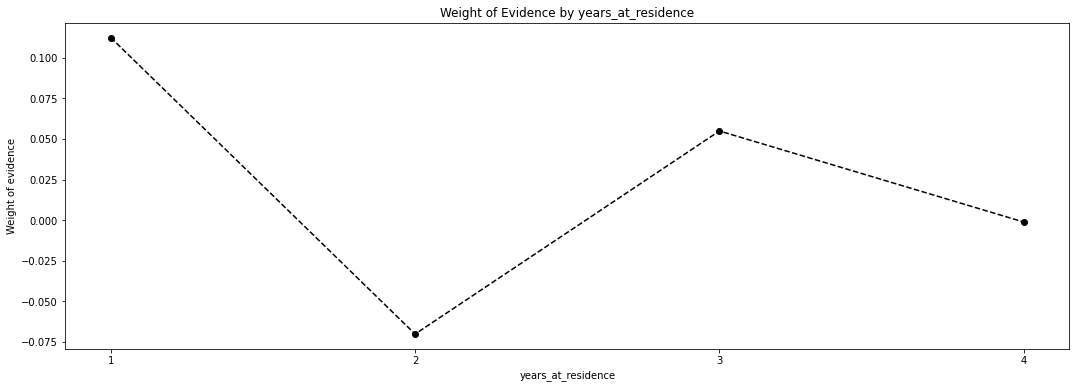

In [77]:
plot_by_woe(df_temp)

In [78]:
df_loan_data['years_at_residence_1'] = np.where((df_loan_data['years_at_residence'] == 1), 1, 0)
df_loan_data['years_at_residence_2'] = np.where((df_loan_data['years_at_residence'] == 2), 1, 0)
df_loan_data['years_at_residence_3'] = np.where((df_loan_data['years_at_residence'] == 3), 1, 0)
df_loan_data['years_at_residence_4'] = np.where((df_loan_data['years_at_residence'] == 4), 1, 0)

# Variable : 'age'

In [79]:
df_loan_data['age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [80]:
df_loan_data['age_factor'] = pd.cut(df_loan_data['age'], 10)

In [81]:
df_temp = woe_ordered_continuous(df_loan_data, 'age_factor', df_loan_data['default_encoded'])
df_temp

,age_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,"(18.944, 24.6]",149,0.590604,0.149,88.0,61.0,0.125714,0.203333,-0.480835,NaN,NaN,0.108251
1,"(24.6, 30.2]",262,0.667939,0.262,175.0,87.0,0.250000,0.290000,-0.148420,0.077335,0.332415,0.108251
2,"(30.2, 35.8]",177,0.717514,0.177,127.0,50.0,0.181429,0.166667,0.084866,0.049575,0.233286,0.108251
3,"(35.8, 41.4]",155,0.780645,0.155,121.0,34.0,0.172857,0.113333,0.422132,0.063131,0.337266,0.108251
4,"(41.4, 47.0]",106,0.716981,0.106,76.0,30.0,0.108571,0.100000,0.082238,0.063664,0.339894,0.108251
5,"(47.0, 52.6]",55,0.836364,0.055,46.0,9.0,0.065714,0.030000,0.784119,0.119383,0.701881,0.108251
6,"(52.6, 58.2]",42,0.642857,0.042,27.0,15.0,0.038571,0.050000,-0.259511,0.193506,1.043630,0.108251
7,"(58.2, 63.8]",26,0.692308,0.026,18.0,8.0,0.025714,0.026667,-0.036368,0.049451,0.223144,0.108251
8,"(63.8, 69.4]",21,0.761905,0.021,16.0,5.0,0.022857,0.016667,0.315853,0.069597,0.352221,0.108251
9,"(69.4, 75.0]",7,0.857143,0.007,6.0,1.0,0.008571,0.003333,0.944462,0.095238,0.628609,0.108251


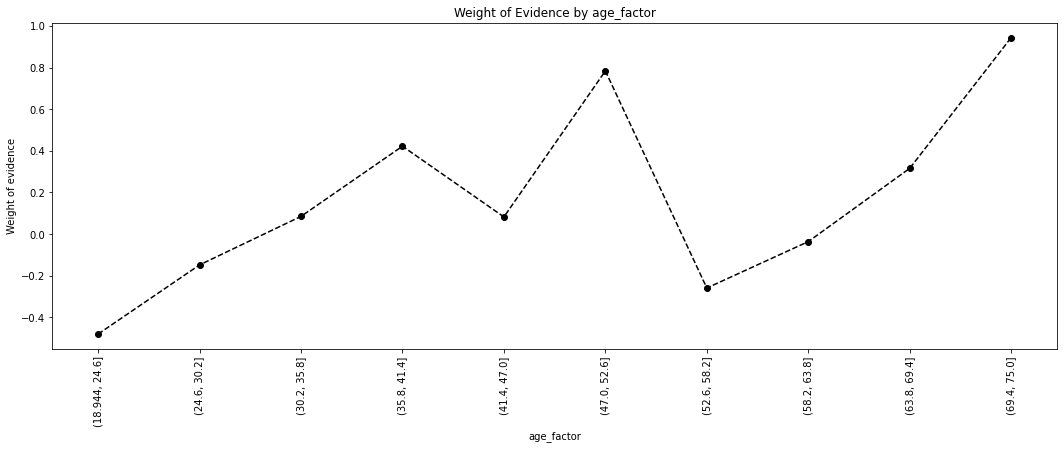

In [82]:
plot_by_woe(df_temp, 90)

In [83]:
df_loan_data['age_<25'] =  np.where(df_loan_data['age'].isin(range(26)), 1, 0)
df_loan_data['age_26-29'] = np.where(df_loan_data['age'].isin(range(26, 30)), 1, 0)
df_loan_data['age_30-47'] = np.where(df_loan_data['age'].isin(range(30, 48)), 1, 0)
df_loan_data['age_>47'] = np.where(df_loan_data['age'].isin(range(48, int(df_loan_data['months_loan_duration'].max()))), 1, 0)

# Variable : 'existing_loans_count'

In [84]:
df_loan_data['existing_loans_count'].unique()

array([2, 1, 3, 4], dtype=int64)

In [85]:
df_temp = woe_ordered_continuous(df_loan_data, 'existing_loans_count', df_loan_data['default_encoded'])
df_temp

,existing_loans_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,1,633,0.684044,0.633,433.0,200.0,0.618571,0.666667,-0.074877,NaN,NaN,0.013267
1,2,333,0.723724,0.333,241.0,92.0,0.344286,0.306667,0.115710,0.039679,0.190588,0.013267
2,3,28,0.785714,0.028,22.0,6.0,0.031429,0.020000,0.451985,0.061991,0.336275,0.013267
3,4,6,0.666667,0.006,4.0,2.0,0.005714,0.006667,-0.154151,0.119048,0.606136,0.013267


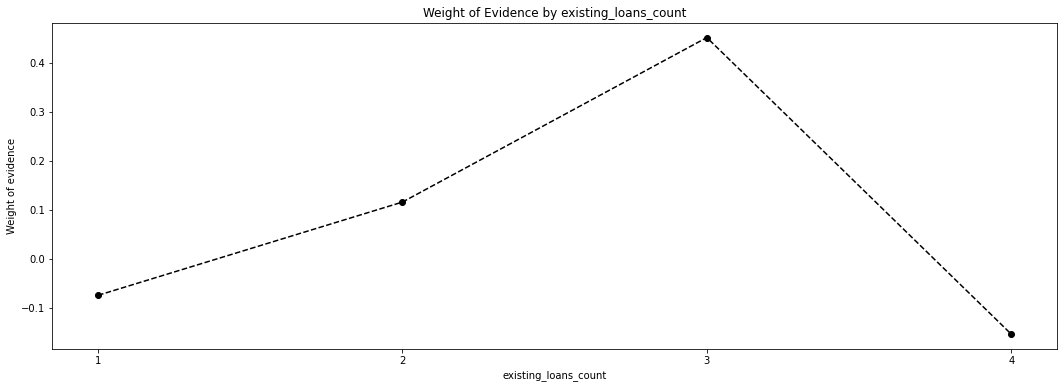

In [86]:
plot_by_woe(df_temp)

In [87]:
df_loan_data['existing_loans_count_1'] = np.where((df_loan_data['existing_loans_count'] == 1), 1, 0)
df_loan_data['existing_loans_count_2-4'] = np.where((df_loan_data['existing_loans_count'].isin(range(2,5))), 1, 0)

# Variable : 'dependents' 

In [88]:
df_loan_data['dependents'].unique()

array([1, 2], dtype=int64)

In [89]:
df_temp = woe_ordered_continuous(df_loan_data, 'dependents', df_loan_data['default_encoded'])
df_temp

,dependents,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,1,845,0.699408,0.845,591.0,254.0,0.844286,0.846667,-0.002816,NaN,NaN,0.000043
1,2,155,0.703226,0.155,109.0,46.0,0.155714,0.153333,0.015409,0.003818,0.018225,0.000043


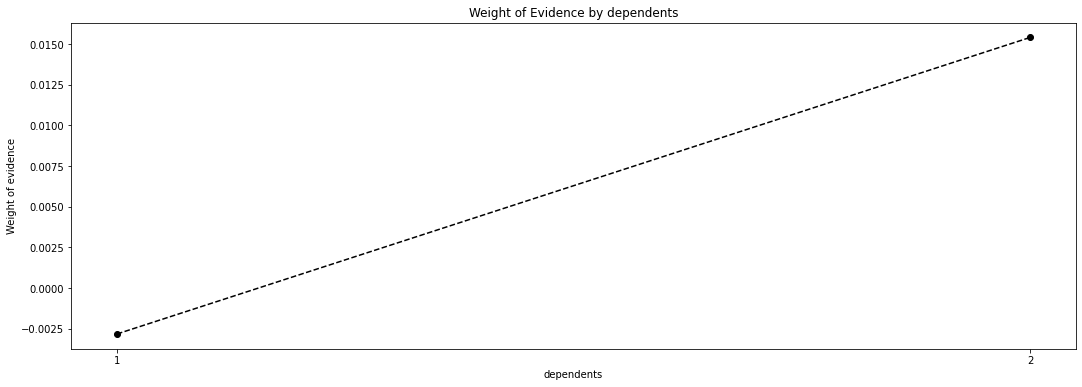

In [90]:
plot_by_woe(df_temp)

In [91]:
# Dependents with '2' are much more riskier than 1 dependent

df_loan_data['dependents_1'] = np.where((df_loan_data['dependents'] == 1), 1, 0)
df_loan_data['dependents_2'] = np.where((df_loan_data['dependents'] == 2), 1, 0)

In [92]:
print(df_loan_data.shape)

(1000, 90)


In [93]:
df_loan_data.head()

,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,default_encoded,credit_history_perfect_good_verygood,credit_history_poor_critical,purpose_edu_ren_bus,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,other_credit_bank_store,housing_other_rent,months_loan_duration_factor,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,amount_factor,amount_<=2067,amount_>2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,percent_of_income_4,years_at_residence_1,years_at_residence_2,years_at_residence_3,years_at_residence_4,age_factor,age_<25,age_26-29,age_30-47,age_>47,existing_loans_count_1,existing_loans_count_2-4,dependents_1,dependents_2
0,< 0 Rs,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,"(3.932, 10.8]",1,0,0,"(231.826, 2067.4]",1,0,0,0,0,1,0,0,0,1,"(63.8, 69.4]",0,0,0,1,0,1,1,0
1,1000 - 200000 Rs,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100000 Rs,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,"(44.8, 51.6]",0,0,1,"(5702.2, 7519.6]",0,1,0,1,0,0,0,1,0,0,"(18.944, 24.6]",1,0,0,0,1,0,1,0
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100000 Rs,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,"(10.8, 17.6]",0,1,0,"(2067.4, 3884.8]",0,1,0,1,0,0,0,0,1,0,"(47.0, 52.6]",0,0,0,1,1,0,0,1
3,< 0 Rs,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100000 Rs,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,"(38.0, 44.8]",0,0,1,"(7519.6, 9337.0]",0,1,0,1,0,0,0,0,0,1,"(41.4, 47.0]",0,0,1,0,1,0,0,1
4,< 0 Rs,24,1800,0.00,1800.00000,poor,car,4870,< 100000 Rs,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,"(17.6, 24.4]",0,0,1,"(3884.8, 5702.2]",0,1,0,0,1,0,0,0,0,1,"(52.6, 58.2]",0,0,0,1,0,1,0,1


In [94]:
# Droping the original categorical variables

df_loan_data.drop(['checking_balance', 'credit_history', 'purpose', 'savings_balance','employment_duration', 
                   'percent_of_income', 'years_at_residence','age', 'other_credit', 'housing', 'existing_loans_count',
                   'job', 'dependents', 'phone', 'default', 'months_loan_duration', 'months_loan_duration_factor', 
                   'amount', 'amount_factor', 'age_factor'], axis = 1, inplace=True)

In [95]:
df_loan_data.head()

,funded_amnt,total_rec_prncp,recoveries,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,default_encoded,credit_history_perfect_good_verygood,credit_history_poor_critical,purpose_edu_ren_bus,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,other_credit_bank_store,housing_other_rent,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,amount_<=2067,amount_>2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,percent_of_income_4,years_at_residence_1,years_at_residence_2,years_at_residence_3,years_at_residence_4,age_<25,age_26-29,age_30-47,age_>47,existing_loans_count_1,existing_loans_count_2-4,dependents_1,dependents_2
0,20000,269.45,20502.14000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,13200,554.76,13425.98797,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,16800,434.03,17076.02000,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
3,1500,65.48,1516.38000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
4,1800,0.00,1800.00000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1


# Splitting the dataset

In [96]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(df_loan_data.drop('default_encoded', axis=1), df_loan_data['default_encoded'], test_size=0.2, random_state=42) 

In [97]:
loan_data_inputs_train.head()

,funded_amnt,total_rec_prncp,recoveries,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_perfect_good_verygood,credit_history_poor_critical,purpose_edu_ren_bus,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,other_credit_bank_store,housing_other_rent,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,amount_<=2067,amount_>2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,percent_of_income_4,years_at_residence_1,years_at_residence_2,years_at_residence_3,years_at_residence_4,age_<25,age_26-29,age_30-47,age_>47,existing_loans_count_1,existing_loans_count_2-4,dependents_1,dependents_2
29,10400,2372.67,5511.48,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
535,16150,3254.83,0.00,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
695,30000,17820.15,0.00,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
557,20000,20000.00,0.00,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
836,5500,3201.50,0.00,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0


# Oversampling the minority class

In [98]:
# Oversampling examples for minority class in this case 'default = yes'

print("Before OverSampling, counts of non-default / Good borrower in training data: {}".format(sum(loan_data_targets_train == 1)))
print("Before OverSampling, counts of default / Bad borrower in training data: {} \n".format(sum(loan_data_targets_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 40)
loan_data_inputs_train_smote, loan_data_targets_train_smote = sm.fit_resample(loan_data_inputs_train, loan_data_targets_train)

print('After OverSampling, the shape of loan_data_inputs_train: {}'.format(loan_data_inputs_train_smote.shape))
print('After OverSampling, the shape of loan_data_targets_train: {} \n'.format(loan_data_targets_train_smote.shape))

print("After OverSampling, counts of non-default / Good borrower in training data: {}".format(sum(loan_data_targets_train_smote == 1)))
print("After OverSampling, counts of default / Bad borrower in training data: {}".format(sum(loan_data_targets_train_smote == 0)))

Before OverSampling, counts of non-default / Good borrower in training data: 559
Before OverSampling, counts of default / Bad borrower in training data: 241 

After OverSampling, the shape of loan_data_inputs_train: (1118, 69)
After OverSampling, the shape of loan_data_targets_train: (1118,) 

After OverSampling, counts of non-default / Good borrower in training data: 559
After OverSampling, counts of default / Bad borrower in training data: 559


In [99]:
loan_data_inputs_train = pd.DataFrame(loan_data_inputs_train_smote)
loan_data_inputs_train.head()

,funded_amnt,total_rec_prncp,recoveries,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_perfect_good_verygood,credit_history_poor_critical,purpose_edu_ren_bus,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,other_credit_bank_store,housing_other_rent,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,amount_<=2067,amount_>2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,percent_of_income_4,years_at_residence_1,years_at_residence_2,years_at_residence_3,years_at_residence_4,age_<25,age_26-29,age_30-47,age_>47,existing_loans_count_1,existing_loans_count_2-4,dependents_1,dependents_2
0,10400,2372.67,5511.48,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
1,16150,3254.83,0.00,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,30000,17820.15,0.00,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,20000,20000.00,0.00,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
4,5500,3201.50,0.00,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0


In [100]:
loan_data_inputs_train_smote.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train_smote.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [101]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col=0)
loan_data_inputs_test= pd.read_csv('loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test= pd.read_csv('loan_data_targets_test.csv', index_col=0)

In [102]:
print(loan_data_inputs_train.shape)
loan_data_inputs_train.head()

(1118, 69)


,funded_amnt,total_rec_prncp,recoveries,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_perfect_good_verygood,credit_history_poor_critical,purpose_edu_ren_bus,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,other_credit_bank_store,housing_other_rent,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,amount_<=2067,amount_>2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,percent_of_income_4,years_at_residence_1,years_at_residence_2,years_at_residence_3,years_at_residence_4,age_<25,age_26-29,age_30-47,age_>47,existing_loans_count_1,existing_loans_count_2-4,dependents_1,dependents_2
0,10400,2372.67,5511.48,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
1,16150,3254.83,0.00,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,30000,17820.15,0.00,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,20000,20000.00,0.00,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
4,5500,3201.50,0.00,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0


In [103]:
print(loan_data_inputs_test.shape)
loan_data_inputs_test.head()

(200, 69)


,funded_amnt,total_rec_prncp,recoveries,checking_balance_1000 - 200000 Rs,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100000 - 500000 Rs,savings_balance_500000 - 1000000 Rs,savings_balance_< 100000 Rs,savings_balance_> 1000000 Rs,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_perfect_good_verygood,credit_history_poor_critical,purpose_edu_ren_bus,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,other_credit_bank_store,housing_other_rent,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,amount_<=2067,amount_>2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,percent_of_income_4,years_at_residence_1,years_at_residence_2,years_at_residence_3,years_at_residence_4,age_<25,age_26-29,age_30-47,age_>47,existing_loans_count_1,existing_loans_count_2-4,dependents_1,dependents_2
521,15000,4482.35,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
737,16750,10347.30,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
740,10000,10000.00,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
660,9450,5220.94,0.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
411,12000,12000.00,0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0


In [104]:
print(loan_data_targets_train.shape)
loan_data_targets_train.head()

(1118, 1)


,default_encoded
0,0
1,0
2,1
3,0
4,1


In [105]:
print(loan_data_targets_test.shape)
loan_data_targets_test.head()

(200, 1)


,default_encoded
521,0
737,1
740,1
660,1
411,1


# Selecting the features

In [106]:
# We only take the variables we created using fine and course classing

inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['checking_balance_< 0 Rs',
'checking_balance_> 200000 Rs',
'checking_balance_1000 - 200000 Rs',
'checking_balance_unknown',
'credit_history_perfect_good_verygood',
'credit_history_critical',
'purpose_edu_ren_bus',
'purpose_furniture/appliances',
'purpose_car',
'savings_balance_<100000Rs_100000-500000Rs',
'savings_balance_500000-1000000Rs',
'savings_balance_unknown',
'employment_duration_<1yr_unemployed',
'employment_duration_>7yr_4-7yr',
'employment_duration_1 - 4 years',
'other_credit_bank_store',
'other_credit_none',
'housing_other_rent',
'housing_own',
'job_management',
'job_unemployed',
'job_skilled',
'job_unskilled',
'phone_yes',
'phone_no',
'months_loan_duration_<11',
'months_loan_duration_12-18',
'months_loan_duration_>18',
'amount_<=2067',
'amount_>2067',
'percent_of_income_1',
'percent_of_income_2',
'percent_of_income_3',
'percent_of_income_4',
'years_at_residence_1',
'years_at_residence_2',
'years_at_residence_3',
'years_at_residence_4',
'dependents_1',
'dependents_2',
'existing_loans_count_1',
'existing_loans_count_2-4',
'age_<25',
'age_26-29',
'age_30-47',
'age_>47'                                      
]]

In [107]:
# Now we remove one of the dummy variable

ref_categories = ['checking_balance_< 0 Rs',
'credit_history_perfect_good_verygood',
'purpose_edu_ren_bus',
'savings_balance_<100000Rs_100000-500000Rs',
'employment_duration_<1yr_unemployed',
'other_credit_bank_store',
'housing_other_rent',
'job_management',
'phone_no',
'months_loan_duration_>18',
'amount_>2067',
'percent_of_income_4',
'years_at_residence_4',
'dependents_1',
'existing_loans_count_1',
'age_<25'
]

In [108]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
print(inputs_train.shape)
inputs_train.head()

(1118, 30)


,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_critical,purpose_furniture/appliances,purpose_car,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_none,housing_own,job_unemployed,job_skilled,job_unskilled,phone_yes,months_loan_duration_<11,months_loan_duration_12-18,amount_<=2067,percent_of_income_1,percent_of_income_2,percent_of_income_3,years_at_residence_1,years_at_residence_2,years_at_residence_3,dependents_2,existing_loans_count_2-4,age_26-29,age_30-47,age_>47
0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


# Logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [110]:
reg = LogisticRegression()

In [111]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [112]:
# Contains the columns

feature_name = inputs_train.columns.values
feature_name

array(['checking_balance_> 200000 Rs',
       'checking_balance_1000 - 200000 Rs', 'checking_balance_unknown',
       'credit_history_critical', 'purpose_furniture/appliances',
       'purpose_car', 'savings_balance_500000-1000000Rs',
       'savings_balance_unknown', 'employment_duration_>7yr_4-7yr',
       'employment_duration_1 - 4 years', 'other_credit_none',
       'housing_own', 'job_unemployed', 'job_skilled', 'job_unskilled',
       'phone_yes', 'months_loan_duration_<11',
       'months_loan_duration_12-18', 'amount_<=2067',
       'percent_of_income_1', 'percent_of_income_2',
       'percent_of_income_3', 'years_at_residence_1',
       'years_at_residence_2', 'years_at_residence_3', 'dependents_2',
       'existing_loans_count_2-4', 'age_26-29', 'age_30-47', 'age_>47'],
      dtype=object)

In [113]:
# Summary table dataframe that contains feature names and their corresponding coefficients
 
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)  # We need to transpose turning from row to column
# Add one coefficient not associated with an independent variable(Intercept)
summary_table.index = summary_table.index + 1          
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-4.910545
1,checking_balance_> 200000 Rs,1.068456
2,checking_balance_1000 - 200000 Rs,0.584118
3,checking_balance_unknown,1.781155
4,credit_history_critical,0.994056
5,purpose_furniture/appliances,1.177392
6,purpose_car,0.615830
7,savings_balance_500000-1000000Rs,0.775392
8,savings_balance_unknown,0.853679
9,employment_duration_>7yr_4-7yr,0.845611


In [114]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [115]:
reg = LogisticRegression_with_p_values()

In [116]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)  # We need to transpose turning from row to column
# Add one coefficient not associated with an independent variable(Intercept)
summary_table.index = summary_table.index + 1          
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-4.910545
1,checking_balance_> 200000 Rs,1.068456
2,checking_balance_1000 - 200000 Rs,0.584118
3,checking_balance_unknown,1.781155
4,credit_history_critical,0.994056
5,purpose_furniture/appliances,1.177392
6,purpose_car,0.615830
7,savings_balance_500000-1000000Rs,0.775392
8,savings_balance_unknown,0.853679
9,employment_duration_>7yr_4-7yr,0.845611


In [118]:
p_values = reg.p_values

In [119]:
p_values = np.append(np.nan, np.array(p_values))

In [120]:
summary_table['p_values'] = p_values

In [121]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-4.910545,NaN
1,checking_balance_> 200000 Rs,1.068456,9.128322e-03
2,checking_balance_1000 - 200000 Rs,0.584118,4.957586e-03
3,checking_balance_unknown,1.781155,1.634010e-15
4,credit_history_critical,0.994056,8.199873e-05
5,purpose_furniture/appliances,1.177392,1.571376e-08
6,purpose_car,0.615830,5.170673e-03
7,savings_balance_500000-1000000Rs,0.775392,2.181978e-02
8,savings_balance_unknown,0.853679,1.019866e-03
9,employment_duration_>7yr_4-7yr,0.845611,1.429097e-04


In [122]:
summary_table.to_csv('summ_new.csv')

In [123]:
# All of the grade dummy has p-value less than 0.05, so their coeffiecients are statistically significant
# The coefficients of home_ownership is also significant
# Next for the addr_state variable, all but the first are statistically significant so we keep all of them
# For acc_now_delinq, there is only 1 dummy variable with statistically significant value, so we keep it.


# delinq_2yrs are not statistically significant acc to widely accepted criteria of 1%, 5% or 10% significance level.
# So we can remove it from final model
# open_acc none are significant so we remove it
# Similary, none of the variables of pub_rec or total_acc are significant, so we remove both of them.
# For total_rev_hi_lim, only 2 are statistically significant among all, so we can remove all dummy variables of total_rev_hi_lim


#  For the final model, we remove these variables
# delinq_2yrs
# open_acc
# pub_rec
# total_rev_hi_lim
# total_acc

In [124]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['checking_balance_< 0 Rs',
'checking_balance_> 200000 Rs',
'checking_balance_1000 - 200000 Rs',
'checking_balance_unknown',
'credit_history_perfect_good_verygood',
'credit_history_critical',
'purpose_edu_ren_bus',
'purpose_furniture/appliances',
'purpose_car',
'savings_balance_<100000Rs_100000-500000Rs',
'savings_balance_500000-1000000Rs',
'savings_balance_unknown',
'employment_duration_<1yr_unemployed',
'employment_duration_>7yr_4-7yr',
'employment_duration_1 - 4 years',
'other_credit_bank_store',
'other_credit_none',
'housing_other_rent',
'housing_own',
'months_loan_duration_<11',
'months_loan_duration_12-18',
'months_loan_duration_>18',
'age_<25',
'age_26-29',
'age_30-47',
'age_>47'
]]

In [125]:
# Now we remove one of the dummy variable

ref_categories = ['checking_balance_< 0 Rs',
'credit_history_perfect_good_verygood',
'purpose_edu_ren_bus',
'savings_balance_<100000Rs_100000-500000Rs',
'employment_duration_<1yr_unemployed',
'other_credit_bank_store',
'housing_other_rent',
'months_loan_duration_>18',
'age_<25'
]

In [126]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
print(inputs_train.shape)
inputs_train.head()

# This contains only the required features (dummy variables) for our PD model. (All dummies - reference)

(1118, 17)


,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_critical,purpose_furniture/appliances,purpose_car,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_none,housing_own,months_loan_duration_<11,months_loan_duration_12-18,age_26-29,age_30-47,age_>47
0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1
3,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
4,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0


In [127]:
reg2 = LogisticRegression_with_p_values()

In [128]:
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
feature_name = inputs_train.columns.values

In [130]:
# Summary table dataframe that contains feature names and their corresponding coefficients
 
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)  # We need to transpose turning from row to column
# Add one coefficient not associated with an independent variable(Intercept)
summary_table.index = summary_table.index + 1          
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-4.267024
1,checking_balance_> 200000 Rs,1.306543
2,checking_balance_1000 - 200000 Rs,0.772305
3,checking_balance_unknown,1.835238
4,credit_history_critical,0.866870
5,purpose_furniture/appliances,1.239322
6,purpose_car,0.726908
7,savings_balance_500000-1000000Rs,0.815731
8,savings_balance_unknown,0.837253
9,employment_duration_>7yr_4-7yr,0.841185


In [131]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-4.267024,NaN
1,checking_balance_> 200000 Rs,1.306543,8.619057e-04
2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05
3,checking_balance_unknown,1.835238,2.660307e-18
4,credit_history_critical,0.866870,1.112585e-04
5,purpose_furniture/appliances,1.239322,1.385421e-10
6,purpose_car,0.726908,3.871105e-04
7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02
8,savings_balance_unknown,0.837253,8.965386e-04
9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05


In [132]:
# After we selected only highly statistically significant sets of dummy variables, the final model contains only 84 significant
# dummy variables

# Assess the performance of PD model

In [133]:
# Make the test dataset ready

# Again reselecting the variables according to their significance

inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['checking_balance_< 0 Rs',
'checking_balance_> 200000 Rs',
'checking_balance_1000 - 200000 Rs',
'checking_balance_unknown',
'credit_history_perfect_good_verygood',
'credit_history_critical',
'purpose_edu_ren_bus',
'purpose_furniture/appliances',
'purpose_car',
'savings_balance_<100000Rs_100000-500000Rs',
'savings_balance_500000-1000000Rs',
'savings_balance_unknown',
'employment_duration_<1yr_unemployed',
'employment_duration_>7yr_4-7yr',
'employment_duration_1 - 4 years',
'other_credit_bank_store',
'other_credit_none',
'housing_other_rent',
'housing_own',
'months_loan_duration_<11',
'months_loan_duration_12-18',
'months_loan_duration_>18',
'age_<25',
'age_26-29',
'age_30-47',
'age_>47'
]]

In [134]:
ref_categories = ['checking_balance_< 0 Rs',
'credit_history_perfect_good_verygood',
'purpose_edu_ren_bus',
'savings_balance_500000-1000000Rs',
'employment_duration_<1yr_unemployed',
'other_credit_bank_store',
'housing_other_rent',
'months_loan_duration_>18',
'age_<25'
]

In [135]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)
print(inputs_test.shape)
inputs_test.head()

# This contains only the required features (dummy variables) for our PD model. (All dummies - reference)

(200, 17)


,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_critical,purpose_furniture/appliances,purpose_car,savings_balance_<100000Rs_100000-500000Rs,savings_balance_unknown,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_none,housing_own,months_loan_duration_<11,months_loan_duration_12-18,age_26-29,age_30-47,age_>47
521,0,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0
737,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0
740,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0
660,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0
411,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0


# Functions for metrics calculation

In [136]:
# Function to display the confusion matrix

def confusion_matrix_heatmap(matrix):
    ax = sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')

    ax.set_title('Confusion Matrix');
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Default','Non-default'])
    ax.yaxis.set_ticklabels(['Default','Non-default'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [137]:
# Function for calculating scores on the final training and testing dataset

def prediction_scores_training_testing(optimized_model, X_train, y_train, X_val_or_test, y_val_or_test):
    
    # Predicted model results
    y_pred_model = optimized_model.predict(X_val_or_test)
    
    # Accuracy on Training set
    training_accuracy = round(optimized_model.score(X_train, y_train)* 100,2)
    
    # Accuracy on Testing set
    testing_accuracy = round(optimized_model.score(X_val_or_test, y_val_or_test)* 100, 2)
    
    # Confusion matrix on test data
    matrix = confusion_matrix(y_val_or_test, y_pred_model)

    # Precision
    precision = round(precision_score(y_val_or_test, y_pred_model) * 100, 2)
    
    # Recall
    recall = round(recall_score(y_val_or_test, y_pred_model) * 100, 2)
    
    #F1-score
    f1_value = round(f1_score(y_val_or_test, y_pred_model) * 100, 2)
    
    return matrix, training_accuracy, testing_accuracy, precision, recall, f1_value

In [138]:
# Function to display the predicted scores

def get_prediction_scores_training_testing(grid_search_model, which_set):
    if which_set == 'Validation':
        matrix, training_accuracy, testing_accuracy, precision, recall, f1_value = prediction_scores_training_testing(grid_search_model, X_train, y_train, X_val, y_val)
    if which_set == 'Testing':
        matrix, training_accuracy, testing_accuracy, precision, recall, f1_value = prediction_scores_training_testing(grid_search_model, X_train, y_train, X_test, y_test)
    print(f'Results:\nTraining accuracy\t:{training_accuracy}\nTesting accuracy\t:{testing_accuracy}\nPrecision\t\t:{precision}\nRecall\t\t\t:{recall}\nF1-score\t\t:{f1_value}')
    confusion_matrix_heatmap(matrix)

In [139]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [140]:
get_prediction_scores_training_testing

<function __main__.get_prediction_scores_training_testing(grid_search_model, which_set)>

# Estimate the PD of each observation

In [141]:
y_hat_test = reg2.model.predict(inputs_test)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- savings_balance_<100000Rs_100000-500000Rs
Feature names seen at fit time, yet now missing:
- savings_balance_500000-1000000Rs

  warnings.warn(message, FutureWarning)


In [142]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- savings_balance_<100000Rs_100000-500000Rs
Feature names seen at fit time, yet now missing:
- savings_balance_500000-1000000Rs

  warnings.warn(message, FutureWarning)


In [143]:
y_hat_test_proba

array([[0.39088234, 0.60911766],
       [0.30477992, 0.69522008],
       [0.58209687, 0.41790313],
       [0.25128264, 0.74871736],
       [0.03871378, 0.96128622],
       [0.53781434, 0.46218566],
       [0.04341479, 0.95658521],
       [0.36411568, 0.63588432],
       [0.08293152, 0.91706848],
       [0.2669918 , 0.7330082 ],
       [0.10509302, 0.89490698],
       [0.45482416, 0.54517584],
       [0.1197742 , 0.8802258 ],
       [0.70584814, 0.29415186],
       [0.63996595, 0.36003405],
       [0.20799521, 0.79200479],
       [0.16363589, 0.83636411],
       [0.01805728, 0.98194272],
       [0.34251421, 0.65748579],
       [0.14654622, 0.85345378],
       [0.07074946, 0.92925054],
       [0.75127866, 0.24872134],
       [0.01086399, 0.98913601],
       [0.00696165, 0.99303835],
       [0.01088251, 0.98911749],
       [0.65929597, 0.34070403],
       [0.43957792, 0.56042208],
       [0.43821271, 0.56178729],
       [0.07074946, 0.92925054],
       [0.0900987 , 0.9099013 ],
       [0.

In [144]:
# Each of the above array consist of 2 elements. 1st is PD of being bad borrower, 2nd is PD of being good borrower. 
# first is PD, then second is 1 - PD

# A new array is created where each element is equal to the 2nd element of the above array
y_hat_test_proba[:][:, 1] 

array([0.60911766, 0.69522008, 0.41790313, 0.74871736, 0.96128622,
       0.46218566, 0.95658521, 0.63588432, 0.91706848, 0.7330082 ,
       0.89490698, 0.54517584, 0.8802258 , 0.29415186, 0.36003405,
       0.79200479, 0.83636411, 0.98194272, 0.65748579, 0.85345378,
       0.92925054, 0.24872134, 0.98913601, 0.99303835, 0.98911749,
       0.34070403, 0.56042208, 0.56178729, 0.92925054, 0.9099013 ,
       0.84733006, 0.87923766, 0.93615905, 0.97960628, 0.86926902,
       0.45117472, 0.65110703, 0.94380236, 0.91624694, 0.376661  ,
       0.91124449, 0.97389989, 0.8085199 , 0.96275471, 0.8636363 ,
       0.8962823 , 0.41717843, 0.92813125, 0.72869009, 0.84559803,
       0.20252053, 0.97693294, 0.79383093, 0.77913613, 0.89040119,
       0.23939135, 0.81489227, 0.41974102, 0.09330639, 0.93166539,
       0.68148792, 0.52705961, 0.73960262, 0.93352576, 0.86178013,
       0.7122185 , 0.96020525, 0.51984196, 0.73723247, 0.93361515,
       0.88786944, 0.95487184, 0.95266129, 0.69498476, 0.67227

In [145]:
y_hat_test_proba = y_hat_test_proba[:][:, 1]
# Array containing only PD of good borrowers

In [146]:
loan_data_targets_test_temp = loan_data_targets_test

loan_data_targets_test_temp.reset_index(drop = True, inplace=True)

df_actual_predicted_probs = pd.concat([loan_data_targets_test, pd.DataFrame(y_hat_test_proba)], axis=1)

df_actual_predicted_probs.shape

df_actual_predicted_probs.columns=['loan_data_targets_test', 'y_hat_test_proba']

df_actual_predicted_probs.index = loan_data_inputs_test.index

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
521,0,0.609118
737,1,0.695220
740,1,0.417903
660,1,0.748717
411,1,0.961286


In [147]:
tr = 0.6
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [148]:
print(f"O's -> Risky in test set: {np.count_nonzero(loan_data_targets_test == 0)} & 1's -> Safe in test set: {np.count_nonzero(loan_data_targets_test == 1)}")

O's -> Risky in test set: 59 & 1's -> Safe in test set: 141


76.0
[[ 28  31]
 [ 17 124]]


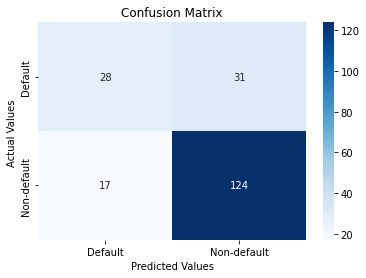

In [149]:
# Accuracy on Testing set

testing_accuracy = round(accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])* 100, 2)
print(testing_accuracy)

matrix = confusion_matrix(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])
print(matrix)
confusion_matrix_heatmap(matrix)

In [150]:
a = loan_data_inputs_test.iloc[0]
np.array(a)

array([1.50000e+04, 4.48235e+03, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00])

# ROC curve

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1st array is FP, 2nd array is TP, 3rd is threshold

# Extracting these arrays into variables for easier manipulation

fpr, tpr, threshold = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], 
                                df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

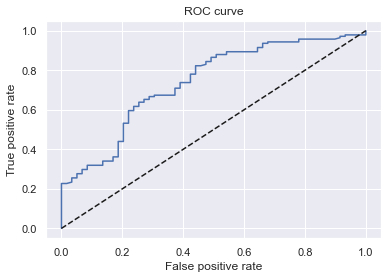

In [152]:
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')


In [153]:

AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7394518571943743

In [154]:
# Gini and Kolmogorov-Smirnov

# In order to plot it, we need to order our dataframe that contains the targets and probabilities by the estimated probabilities
# in the ascending order

df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [155]:

# To calculate cumulative proportions, we need to reindex the dataframe as it is sorted now
# We need the row with lowest y_hat_test_proba to have an index of 0 and next one 1 as so on 

df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,208,1,0.081364,0
1,613,1,0.086636,0
2,221,1,0.093306,0
3,721,0,0.094588,0
4,570,0,0.202521,0


In [156]:

# To make plots of our model performance criteria
# cumulative % of total population
# cumulative % of good borrowers
# cumulative % of bad borrowers

df_actual_predicted_probs['Cumulative N Populations'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Populations'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Populations,Cumulative N Good,Cumulative N Bad
0,208,1,0.081364,0,1,1,0
1,613,1,0.086636,0,2,2,0
2,221,1,0.093306,0,3,3,0
3,721,0,0.094588,0,4,3,1
4,570,0,0.202521,0,5,3,2


In [157]:

df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.
print(df_actual_predicted_probs.shape)
df_actual_predicted_probs.head()

(200, 8)


,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Populations,Cumulative N Good,Cumulative N Bad,Cumulative N Population
0,208,1,0.081364,0,1,1,0,1
1,613,1,0.086636,0,2,2,0,2
2,221,1,0.093306,0,3,3,0,3
3,721,0,0.094588,0,4,3,1,4
4,570,0,0.202521,0,5,3,2,5


In [158]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'

Text(0.5, 1.0, 'Gini')

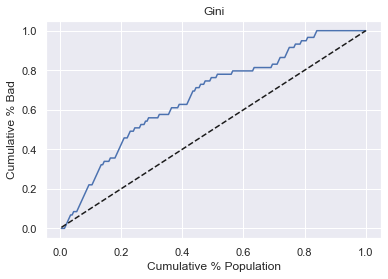

In [159]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [160]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4789037143887487

In [161]:
# Calculating Kolmogorov Smirnov coefficient

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

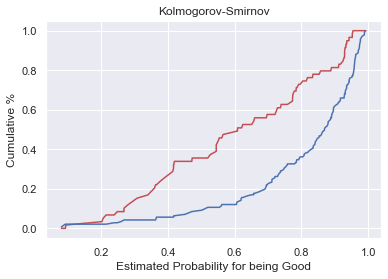

In [162]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [163]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.3840605842048323

# PD for a single customer 

In [164]:
inputs_test_with_ref_cat.head()

,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_perfect_good_verygood,credit_history_critical,purpose_edu_ren_bus,purpose_furniture/appliances,purpose_car,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_bank_store,other_credit_none,housing_other_rent,housing_own,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,age_<25,age_26-29,age_30-47,age_>47
521,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
737,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
740,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
660,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
411,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0


In [165]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-4.267024,NaN
1,checking_balance_> 200000 Rs,1.306543,8.619057e-04
2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05
3,checking_balance_unknown,1.835238,2.660307e-18
4,credit_history_critical,0.866870,1.112585e-04
5,purpose_furniture/appliances,1.239322,1.385421e-10
6,purpose_car,0.726908,3.871105e-04
7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02
8,savings_balance_unknown,0.837253,8.965386e-04
9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05


In [166]:
y_hat_test_proba  # Predicted by using predict_proba

# Probability that the 1st customer (521) will not default is 27% 

array([0.60911766, 0.69522008, 0.41790313, 0.74871736, 0.96128622,
       0.46218566, 0.95658521, 0.63588432, 0.91706848, 0.7330082 ,
       0.89490698, 0.54517584, 0.8802258 , 0.29415186, 0.36003405,
       0.79200479, 0.83636411, 0.98194272, 0.65748579, 0.85345378,
       0.92925054, 0.24872134, 0.98913601, 0.99303835, 0.98911749,
       0.34070403, 0.56042208, 0.56178729, 0.92925054, 0.9099013 ,
       0.84733006, 0.87923766, 0.93615905, 0.97960628, 0.86926902,
       0.45117472, 0.65110703, 0.94380236, 0.91624694, 0.376661  ,
       0.91124449, 0.97389989, 0.8085199 , 0.96275471, 0.8636363 ,
       0.8962823 , 0.41717843, 0.92813125, 0.72869009, 0.84559803,
       0.20252053, 0.97693294, 0.79383093, 0.77913613, 0.89040119,
       0.23939135, 0.81489227, 0.41974102, 0.09330639, 0.93166539,
       0.68148792, 0.52705961, 0.73960262, 0.93352576, 0.86178013,
       0.7122185 , 0.96020525, 0.51984196, 0.73723247, 0.93361515,
       0.88786944, 0.95487184, 0.95266129, 0.69498476, 0.67227

In [167]:
# In practice, these values are not used since banks usually turn them into scorecards for easier understanding for 
# non statisticians. 

# Creating a scorecard

In [168]:
# summary_table contains coefficients of our PD model, except the reference categories
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-4.267024,NaN
1,checking_balance_> 200000 Rs,1.306543,8.619057e-04
2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05
3,checking_balance_unknown,1.835238,2.660307e-18
4,credit_history_critical,0.866870,1.112585e-04
5,purpose_furniture/appliances,1.239322,1.385421e-10
6,purpose_car,0.726908,3.871105e-04
7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02
8,savings_balance_unknown,0.837253,8.965386e-04
9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05


In [169]:
ref_categories

['checking_balance_< 0 Rs',
 'credit_history_perfect_good_verygood',
 'purpose_edu_ren_bus',
 'savings_balance_500000-1000000Rs',
 'employment_duration_<1yr_unemployed',
 'other_credit_bank_store',
 'housing_other_rent',
 'months_loan_duration_>18',
 'age_<25']

In [170]:
df_ref_categories = pd.DataFrame(ref_categories, columns=['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,checking_balance_< 0 Rs,0,NaN
1,credit_history_perfect_good_verygood,0,NaN
2,purpose_edu_ren_bus,0,NaN
3,savings_balance_500000-1000000Rs,0,NaN
4,employment_duration_<1yr_unemployed,0,NaN
5,other_credit_bank_store,0,NaN
6,housing_other_rent,0,NaN
7,months_loan_duration_>18,0,NaN
8,age_<25,0,NaN


In [171]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-4.267024,NaN
1,1,checking_balance_> 200000 Rs,1.306543,8.619057e-04
2,2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05
3,3,checking_balance_unknown,1.835238,2.660307e-18
4,4,credit_history_critical,0.866870,1.112585e-04
5,5,purpose_furniture/appliances,1.239322,1.385421e-10
6,6,purpose_car,0.726908,3.871105e-04
7,7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02
8,8,savings_balance_unknown,0.837253,8.965386e-04
9,9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05


In [172]:
df_scorecard['Original feature names'] = df_scorecard['Feature name'].str.split('_').str[0] 
# Since we need the first string returned by this expression, we put str[0] 

In [173]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature names
0,0,Intercept,-4.267024,NaN,Intercept
1,1,checking_balance_> 200000 Rs,1.306543,8.619057e-04,checking
2,2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05,checking
3,3,checking_balance_unknown,1.835238,2.660307e-18,checking
4,4,credit_history_critical,0.866870,1.112585e-04,credit


In [174]:
# To create a scorecard, we need to convert the regression coefficients from our PD model to simple scores
# Let min score =  300, max score = 850

In [175]:
min_score = 300
max_score = 850

In [176]:
# Rescale the credit worthiness assessment produced by our model to the desired credit score

df_scorecard.groupby("Original feature names")['Coefficients'].min()

Original feature names
Intercept    -4.267024
age           0.000000
checking      0.000000
credit        0.000000
employment    0.000000
housing       0.000000
months        0.000000
other         0.000000
purpose       0.000000
savings       0.000000
Name: Coefficients, dtype: float64

In [177]:
# Now, we need minimum and maximum coefficient value for rescaling the values

In [178]:
min_sum_coef = df_scorecard.groupby('Original feature names')['Coefficients'].min().sum()
min_sum_coef

-4.267023793253068

In [179]:
max_sum_coef = df_scorecard.groupby('Original feature names')['Coefficients'].max().sum()
max_sum_coef

5.307665023257449

In [180]:
# Rescaling the coefficients to scores

df_scorecard['Score - calculation'] = df_scorecard['Coefficients'] * ((max_score - min_score) / (max_sum_coef - min_sum_coef))
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature names,Score - calculation
0,0,Intercept,-4.267024,NaN,Intercept,-245.111160
1,1,checking_balance_> 200000 Rs,1.306543,8.619057e-04,checking,75.051912
2,2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05,checking,44.363606
3,3,checking_balance_unknown,1.835238,2.660307e-18,checking,105.421803
4,4,credit_history_critical,0.866870,1.112585e-04,credit,49.795713
5,5,purpose_furniture/appliances,1.239322,1.385421e-10,purpose,71.190509
6,6,purpose_car,0.726908,3.871105e-04,purpose,41.755855
7,7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02,savings,46.858150
8,8,savings_balance_unknown,0.837253,8.965386e-04,savings,48.094416
9,9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05,employment,48.320296


In [181]:
# We need to calculate intercept_score 

df_scorecard['Score - calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\rasa.bhattarai\AppData\Local\Temp\ipykernel_22728\2952631486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature names,Score - calculation
0,0,Intercept,-4.267024,NaN,Intercept,300.000000
1,1,checking_balance_> 200000 Rs,1.306543,8.619057e-04,checking,75.051912
2,2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05,checking,44.363606
3,3,checking_balance_unknown,1.835238,2.660307e-18,checking,105.421803
4,4,credit_history_critical,0.866870,1.112585e-04,credit,49.795713
5,5,purpose_furniture/appliances,1.239322,1.385421e-10,purpose,71.190509
6,6,purpose_car,0.726908,3.871105e-04,purpose,41.755855
7,7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02,savings,46.858150
8,8,savings_balance_unknown,0.837253,8.965386e-04,savings,48.094416
9,9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05,employment,48.320296


In [182]:
# Round the score calculations because rounded numbers is simple and interpretable credit scores. 

df_scorecard['Score - preliminary'] = df_scorecard['Score - calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature names,Score - calculation,Score - preliminary
0,0,Intercept,-4.267024,NaN,Intercept,300.000000,300.0
1,1,checking_balance_> 200000 Rs,1.306543,8.619057e-04,checking,75.051912,75.0
2,2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05,checking,44.363606,44.0
3,3,checking_balance_unknown,1.835238,2.660307e-18,checking,105.421803,105.0
4,4,credit_history_critical,0.866870,1.112585e-04,credit,49.795713,50.0
5,5,purpose_furniture/appliances,1.239322,1.385421e-10,purpose,71.190509,71.0
6,6,purpose_car,0.726908,3.871105e-04,purpose,41.755855,42.0
7,7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02,savings,46.858150,47.0
8,8,savings_balance_unknown,0.837253,8.965386e-04,savings,48.094416,48.0
9,9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05,employment,48.320296,48.0


In [183]:
min_sum_score_prel = df_scorecard.groupby('Original feature names')['Score - preliminary'].min().sum()
min_sum_score_prel

300.0

In [184]:
max_sum_score_prel = df_scorecard.groupby('Original feature names')['Score - preliminary'].max().sum()
max_sum_score_prel

849.0

In [185]:
# The minimum and maximum possible scores are according to the desirable range

# Calculating credit scores of borrowers 

In [186]:
# To calculate credit scores of borrowers, we have to sum the credit score corresponding to the respective
# dummy categories.

In [187]:
inputs_test_with_ref_cat.head()

,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_perfect_good_verygood,credit_history_critical,purpose_edu_ren_bus,purpose_furniture/appliances,purpose_car,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_bank_store,other_credit_none,housing_other_rent,housing_own,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,age_<25,age_26-29,age_30-47,age_>47
521,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
737,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
740,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
660,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
411,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0


In [188]:
df_scorecard  # Contains the feature name, coefficients and scorecard value of each feature

,index,Feature name,Coefficients,p_values,Original feature names,Score - calculation,Score - preliminary
0,0,Intercept,-4.267024,NaN,Intercept,300.000000,300.0
1,1,checking_balance_> 200000 Rs,1.306543,8.619057e-04,checking,75.051912,75.0
2,2,checking_balance_1000 - 200000 Rs,0.772305,5.735693e-05,checking,44.363606,44.0
3,3,checking_balance_unknown,1.835238,2.660307e-18,checking,105.421803,105.0
4,4,credit_history_critical,0.866870,1.112585e-04,credit,49.795713,50.0
5,5,purpose_furniture/appliances,1.239322,1.385421e-10,purpose,71.190509,71.0
6,6,purpose_car,0.726908,3.871105e-04,purpose,41.755855,42.0
7,7,savings_balance_500000-1000000Rs,0.815731,1.379438e-02,savings,46.858150,47.0
8,8,savings_balance_unknown,0.837253,8.965386e-04,savings,48.094416,48.0
9,9,employment_duration_>7yr_4-7yr,0.841185,2.990932e-05,employment,48.320296,48.0


In [189]:
# Calculate each borrower's credit score using the summation of 'Score-preliminary' with it's corresponding
# dummy variable 

In [190]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept

,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_perfect_good_verygood,credit_history_critical,purpose_edu_ren_bus,purpose_furniture/appliances,purpose_car,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_bank_store,other_credit_none,housing_other_rent,housing_own,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,age_<25,age_26-29,age_30-47,age_>47
521,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
737,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
740,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
660,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
411,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
678,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
626,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0
513,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
859,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0
136,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0


In [191]:
# We create a new column for intercept since there is nothing to multiply intercept with in test dataframe

inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [192]:
inputs_test_with_ref_cat_w_intercept

,Intercept,checking_balance_< 0 Rs,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_perfect_good_verygood,credit_history_critical,purpose_edu_ren_bus,purpose_furniture/appliances,purpose_car,savings_balance_<100000Rs_100000-500000Rs,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_<1yr_unemployed,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_bank_store,other_credit_none,housing_other_rent,housing_own,months_loan_duration_<11,months_loan_duration_12-18,months_loan_duration_>18,age_<25,age_26-29,age_30-47,age_>47
521,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
737,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
740,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
660,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
411,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
678,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
626,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0
513,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
859,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0
136,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0


In [193]:
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
print(inputs_test_with_ref_cat_w_intercept.shape)
inputs_test_with_ref_cat_w_intercept.head()

(200, 27)


,Intercept,checking_balance_> 200000 Rs,checking_balance_1000 - 200000 Rs,checking_balance_unknown,credit_history_critical,purpose_furniture/appliances,purpose_car,savings_balance_500000-1000000Rs,savings_balance_unknown,employment_duration_>7yr_4-7yr,employment_duration_1 - 4 years,other_credit_none,housing_own,months_loan_duration_<11,months_loan_duration_12-18,age_26-29,age_30-47,age_>47,checking_balance_< 0 Rs,credit_history_perfect_good_verygood,purpose_edu_ren_bus,savings_balance_500000-1000000Rs,employment_duration_<1yr_unemployed,other_credit_bank_store,housing_other_rent,months_loan_duration_>18,age_<25
521,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1
737,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0
740,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0
660,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
411,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [194]:
# Store the scores in a new variable

scorecard_scores = df_scorecard['Score - preliminary']
# This variable contains the scores in the order of the variable from the scorecard dataframe.
# It also contains the variables from the test data dataframe

print(inputs_test_with_ref_cat_w_intercept.shape)
print(scorecard_scores.shape)

(200, 27)
(27,)


In [195]:
scorecard_scores = scorecard_scores.values.reshape(27, 1)
scorecard_scores.shape

(27, 1)

In [196]:
# Now we can safely multiply test data dataframe by the scores
# We multiply each row from test data by column with scores and then sum the products
# Intercept(1) * Intercept_value + 'Score-preliminary[for feature x] * 'Feature_name[True for the feature]'  

y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [197]:
y_scores.head()

,0
521,523.0
737,545.0
740,479.0
660,560.0
411,682.0


In [198]:
# Thus, we get the credit score of each individual borrowers

In [199]:
y_scores.columns = ['Scorecard']

In [200]:
y_scores

,Scorecard
521,523.0
737,545.0
740,479.0
660,560.0
411,682.0
678,489.0
626,675.0
513,529.0
859,636.0
136,650.0


# Naive Bayes 

In [201]:
nb = BernoulliNB()
nb.fit(inputs_train, loan_data_targets_train)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [202]:
inputs_test.shape

(200, 17)

In [203]:
np.array(inputs_test.iloc[0])

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [204]:
y_hat_test = nb.predict(inputs_test)

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- savings_balance_<100000Rs_100000-500000Rs
Feature names seen at fit time, yet now missing:
- savings_balance_500000-1000000Rs

  warnings.warn(message, FutureWarning)


In [205]:
y_hat_test_proba = nb.predict_proba(inputs_test)
y_hat_test_proba

C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- savings_balance_<100000Rs_100000-500000Rs
Feature names seen at fit time, yet now missing:
- savings_balance_500000-1000000Rs

  warnings.warn(message, FutureWarning)


array([[1.74449080e-01, 8.25550920e-01],
       [1.38095443e-01, 8.61904557e-01],
       [4.01152261e-01, 5.98847739e-01],
       [1.76755453e-01, 8.23244547e-01],
       [3.53747802e-03, 9.96462522e-01],
       [4.70258591e-01, 5.29741409e-01],
       [9.50248491e-03, 9.90497515e-01],
       [4.20135445e-01, 5.79864555e-01],
       [4.09934997e-02, 9.59006500e-01],
       [2.65502125e-01, 7.34497875e-01],
       [8.39065807e-02, 9.16093419e-01],
       [2.31126041e-01, 7.68873959e-01],
       [8.77638464e-02, 9.12236154e-01],
       [5.17590966e-01, 4.82409034e-01],
       [6.58222083e-01, 3.41777917e-01],
       [7.37923286e-02, 9.26207671e-01],
       [7.12923553e-02, 9.28707645e-01],
       [1.66022563e-03, 9.98339774e-01],
       [1.06763480e-01, 8.93236520e-01],
       [6.38546392e-02, 9.36145361e-01],
       [1.56340308e-02, 9.84365969e-01],
       [5.89161039e-01, 4.10838961e-01],
       [7.46232506e-04, 9.99253767e-01],
       [3.15758855e-04, 9.99684241e-01],
       [7.392177

In [206]:
# Each of the above array consist of 2 elements. 1st is PD of being bad borrower, 2nd is PD of being good borrower. 
# first is PD, then second is 1 - PD

In [207]:
y_hat_test_proba = y_hat_test_proba[:][:, 1]
# Array containing only PD of good borrowers

In [208]:
loan_data_targets_test_temp = loan_data_targets_test

loan_data_targets_test_temp.reset_index(drop = True, inplace=True)

In [209]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)
df_actual_predicted_probs.shape
df_actual_predicted_probs.head()

,default_encoded,0
0,0,0.825551
1,1,0.861905
2,1,0.598848
3,1,0.823245
4,1,0.996463


In [210]:
df_actual_predicted_probs.columns=['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,0,0.825551
1,1,0.861905
2,1,0.598848
3,1,0.823245
4,1,0.996463


In [211]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
521,0,0.825551
737,1,0.861905
740,1,0.598848
660,1,0.823245
411,1,0.996463


In [212]:
tr = 0.7
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
521,0,0.825551,1
737,1,0.861905,1
740,1,0.598848,0
660,1,0.823245,1
411,1,0.996463,1


O's -> Risky in test set: 59 & 1's -> Safe in test set: 141
70.5
[[ 24  35]
 [ 24 117]]


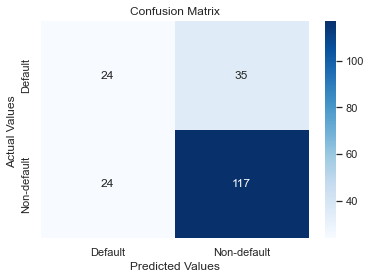

In [213]:
print(f"O's -> Risky in test set: {np.count_nonzero(loan_data_targets_test == 0)} & 1's -> Safe in test set: {np.count_nonzero(loan_data_targets_test == 1)}")

# Accuracy on Testing set

testing_accuracy = round(accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])* 100, 2)
print(testing_accuracy)

matrix = confusion_matrix(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])
print(matrix)
confusion_matrix_heatmap(matrix)

In [214]:
loan_data_targets_test

,default_encoded
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [215]:
import pickle
filename = 'credit_risk_nb.pkl'

pickle.dump(nb, open(filename, 'wb')) 

# loading the saved model
loaded_model = pickle.load(open('credit_risk_nb.pkl', 'rb'))

# input_data = (1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)

input_data = (1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0)
# input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The customer loan is risky')
else:
  print('The customer loan is safe')

[1]
The customer loan is safe


C:\Users\rasa.bhattarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
